In [9]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('trainMergeReady.csv')
data.iloc[:,2:].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,-564854784,5263,555,1,1,0,1,2,0,1270,9,2008,0,22,2012,0
1,2,5,-564854784,6064,625,1,1,0,1,0,0,570,11,2007,1,13,2010,1
2,3,5,-564854784,8314,821,1,1,0,1,0,0,14130,12,2006,1,14,2011,1
3,4,5,-564854784,13995,1498,1,1,0,1,2,2,620,9,2009,0,22,2012,0
4,5,5,-564854784,4822,559,1,1,0,1,0,0,29910,4,2015,0,22,2012,0


In [11]:
from sklearn.model_selection import train_test_split

numeric_cols = ['Store', 'StoreType', 'DayOfWeek', 
              'Promo', 'StateHoliday', 'Season',
              'Assortment','Promo2']

X_train, X_test, y_train, y_test = train_test_split(data[numeric_cols], data['Sales'], test_size=0.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1000)

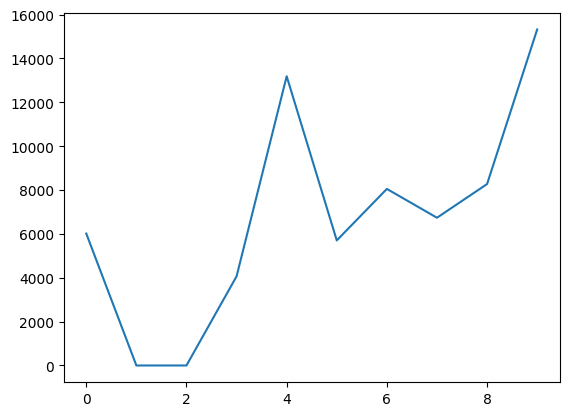

In [18]:
y_test.head(10)
plt.plot(range(0,10),y_test.head(10))

In [22]:
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (8, )))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 150))
model.add(Dropout(0.2))
model.add(LSTM(units = 300))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='relu'))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=["mean_absolute_error"])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 12, validation_data = (X_test, y_test))

Epoch 1/2
22888/22888 [==============================] - 533s 23ms/step - loss: 8731918.0000 - mean_absolute_error: 1926.9387 - val_loss: 1579434.7500 - val_mean_absolute_error: 779.2648
Epoch 2/2
22888/22888 [==============================] - 523s 23ms/step - loss: 2357445.5000 - mean_absolute_error: 1017.0953 - val_loss: 2732752.2500 - val_mean_absolute_error: 995.1896


In [27]:
result = model.predict(X_test)
y_test.columns = ["Actual Sales","Predicted Sales"]

6358/6358 [==============================] - 57s 9ms/step


In [35]:
print(y_test.head(10))
print(result[:10])

871461     6014
201378        0
396282        0
992113     4065
136827    13189
696446     5703
247555     8051
744974     6737
537466     8273
622024    15321
Name: Sales, dtype: int64
[[7548], [24], [4], [4827], [9608], [6943], [6634], [7844], [6226], [7606]]


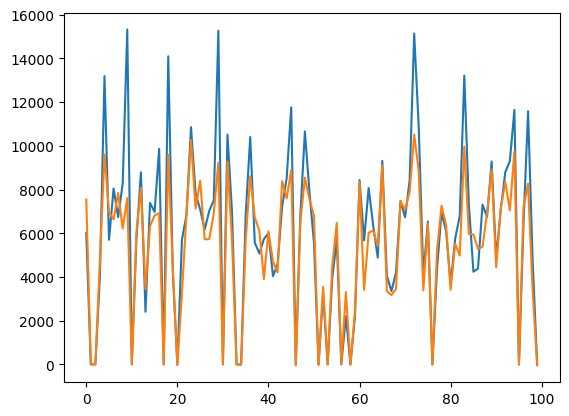

In [36]:
fig = plt.figure(1)
plt.plot(range(0,100), y_test.head(100)) # plot first line
plt.plot(range(0,100), result[:100]) # plot second line
plt.show()